## Modul 1 Andat 2022: Script WOD

Script dalam file ini mencakup 4 visualisasi data, yaitu
1. Lokasi CTD
2. Plot Vertikal Sederhana
3. Diagram T-S
4. Diagram Hovmoller Depth-Station

In [1]:
#menghubungkan notebook dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Instalasi Library

In [1]:
!pip install netCDF4
!pip install pandas
!pip install numpy
!pip install matplotlib
!apt-get install libgeos-3.5.0
!pip install gsw
!pip install basemap #setelah menginstall modul basemap, klik 'restart runtime', lalu di run ulang code box ini

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'


In [2]:
# Import library
import netCDF4 as nc
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import warnings
import gsw

## 1. Lokasi CTD

Visualisasi lokasi CTD digunakan untuk mengetahui lokasi data-data CTD dari WOD sehingga dapat ditentukan titik-titik mana sajakah yang akan digunakan datanya untuk langkah selanjutnya

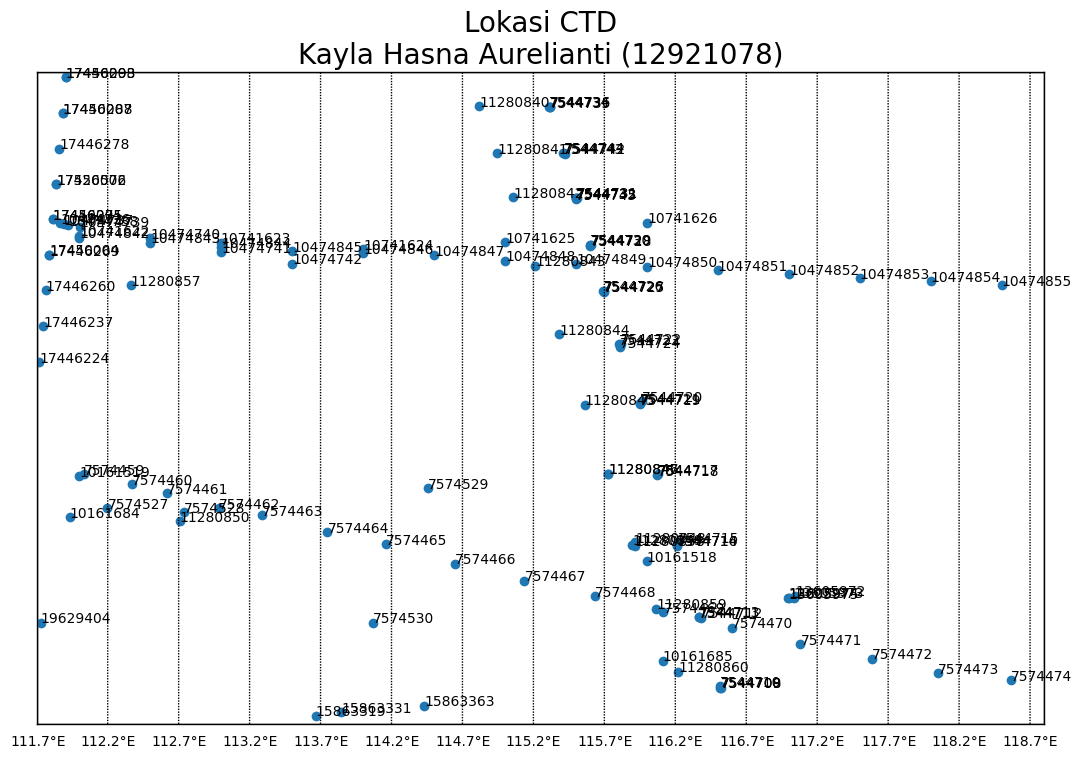

<Figure size 640x480 with 0 Axes>

In [19]:
# read data, sesuaikan path lokasi file yang disimpan pada google drive anda
# silakan ganti pada 'MASUKAN NAMA FOLDER ANDA DISINI', ini merupakan lokasi folder di gdrive anda
fn = '/content/drive/MyDrive/andat/ocldb1695196146.7794.CTD.nc'

#Membuka file .nc
ds=nc.Dataset(fn)
lats=ds.variables['lat'][:]
lons=ds.variables['lon'][:]
time=ds.variables['time'][:]
cast=ds.variables['cast'][:]

#Visualisasi Data
mp=Basemap(projection = 'merc',
          llcrnrlon=111.7,
          llcrnrlat=-13.7,
          urcrnrlon=118.8,
          urcrnrlat=-9.2)

x,y=mp(lons,lats)

fig,ax=plt.subplots(figsize=(13,13))
fig=mp.scatter(x,y)
mp.drawcoastlines()
mp.drawmapboundary()
ax.set_title('Lokasi CTD\n'+ 'Kayla Hasna Aurelianti (12921078)',fontsize=20)

for i, txt in enumerate(cast):
    ax.annotate(txt,(x[i],y[i]))

parallels = np.arange(-9.2,-13.7,0.5)
mp.drawparallels(parallels,labels=[True,False,False,True],color='k')
meridians=np.arange(111.7,118.8,0.5)
mp.drawmeridians(meridians,labels=[False,False,False,True],color='k')

#show gambar tanpa export
plt.show()

#export gambar, berikan directory lokasi export
plt.savefig('/content/drive/MyDrive/andat/LokasiCTD',dpi=150)

### Menentukan Stasiun dan Membuka File

Setelah melihat lokasi CTD, silakan pilih 10 titik yang akan divisualisasi. Usahakan untuk memilih stasiun yang berdekatan dan memiliki pola lurus. Nama file dari WOD sama dengan nama stasiun yang dipilih. Misal dipilih stasiun 007547629O, maka nama file dari WOD nya adalah wod_007547629O.nc

In [10]:
#fungsi untuk membuka file nc dan menyimpan variabelnya
def bukaNC (fn):
    ds=nc.Dataset(fn)
    lats=ds.variables['lat'][0:510]
    lons=ds.variables['lon'][0:510]
    dep=ds.variables['z'][0:510]
    temp=ds.variables['Temperature'][0:510]
    sal=ds.variables['Salinity'][0:510]

    dg={'lat':lats,
         'lon':lons,
         'dep':dep,
         'temp':temp,
         'sal':sal}

    df=pd.DataFrame(dg)
    return df

#Tulis directory lokasi file .nc
fn1='/content/drive/MyDrive/andat/kayla/wod_007544735O.nc'
fn2='/content/drive/MyDrive/andat/kayla/wod_007544736O.nc'
fn3='/content/drive/MyDrive/andat/kayla/wod_007544742O.nc'
fn4='/content/drive/MyDrive/andat/kayla/wod_007544743O.nc'
fn5='/content/drive/MyDrive/andat/kayla/wod_007544744O.nc'
fn6='/content/drive/MyDrive/andat/kayla/wod_007544745O.nc'
fn7='/content/drive/MyDrive/andat/kayla/wod_007574459O.nc'
fn8='/content/drive/MyDrive/andat/kayla/wod_007574460O.nc'
fn9='/content/drive/MyDrive/andat/kayla/wod_007574461O.nc'
fn10='/content/drive/MyDrive/andat/kayla/wod_007574462O.nc'

#Membuka file .nc
data1,data2,data3,data4,data5=bukaNC(fn1),bukaNC(fn2),bukaNC(fn3),bukaNC(fn4),bukaNC(fn5)
data6,data7,data8,data9,data10=bukaNC(fn6),bukaNC(fn7),bukaNC(fn8),bukaNC(fn9),bukaNC(fn10)

## 2. Profil Vertikal Sederhana

Setelah membuka 10 file, pilihlah salah satu data untuk divisualisasikan profil temperatur terhadap kedalamannya

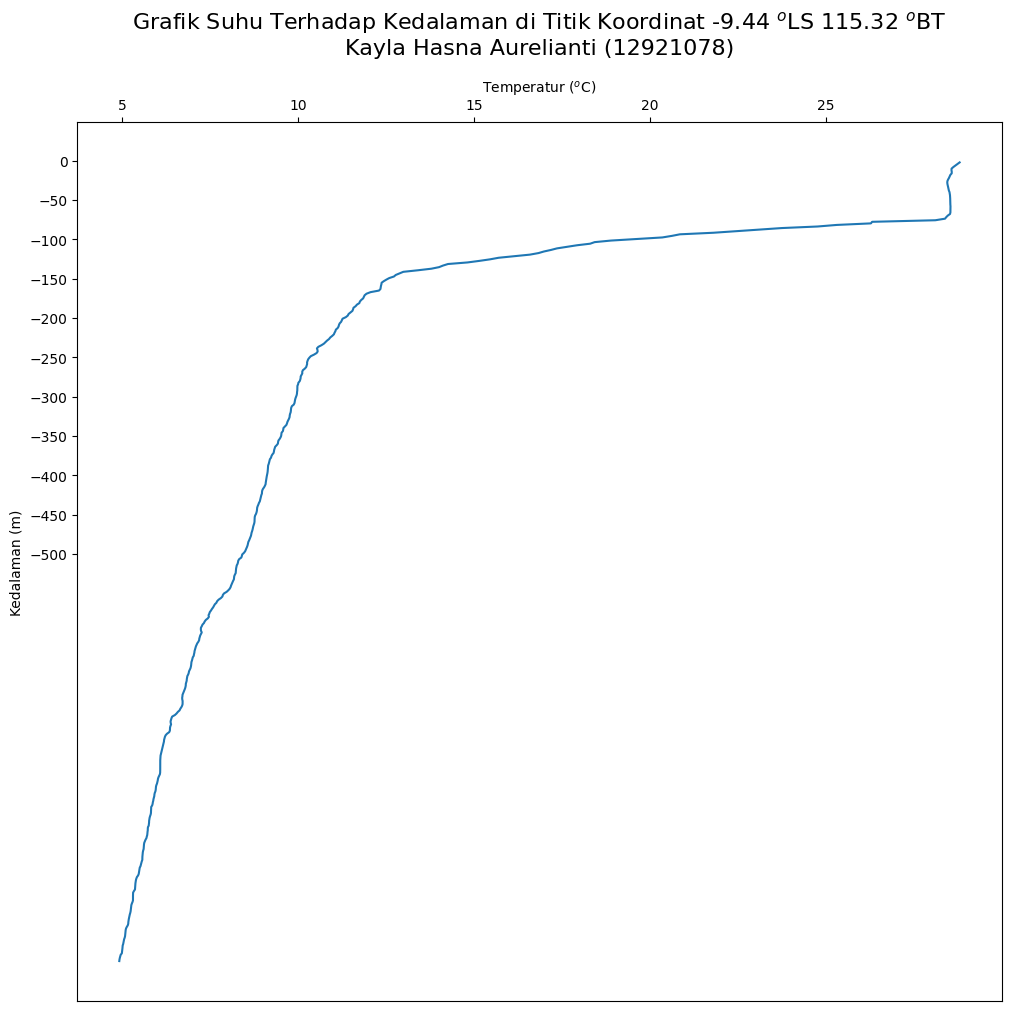

<Figure size 640x480 with 0 Axes>

In [21]:
#import data

lat1=(data1['lat'][0])
lon1=(data1['lon'][0])
dep=(data1['dep'])
temp=(data1['temp'])
sal=(data1['sal'])

ylabel=np.arange(0,-510,-50) #disesuaikan

#membuat plot
fig,ax=plt.subplots(figsize=(10,10),constrained_layout=True)
axes1=ax.plot(temp,-dep)
ax.set_xlabel('\nTemperatur ($^o$C)')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')

ax.set_yticks(ticks=ylabel)
ax.set_ylabel('Kedalaman (m)')
ax.set_title('Grafik Suhu Terhadap Kedalaman di Titik Koordinat '
            +str(round(lat1,2))+' $^o$LS '
            +str(round(lon1,2))+' $^o$BT\n'
            +'Kayla Hasna Aurelianti (12921078)',fontsize=16)
#show gambar tanpa export
plt.show()

#export gambar, berikan directory lokasi export
plt.savefig('/content/drive/MyDrive/andat/GrafikSuhuTerhadapKedalaman',dpi=150)

## 3. Diagram T-S

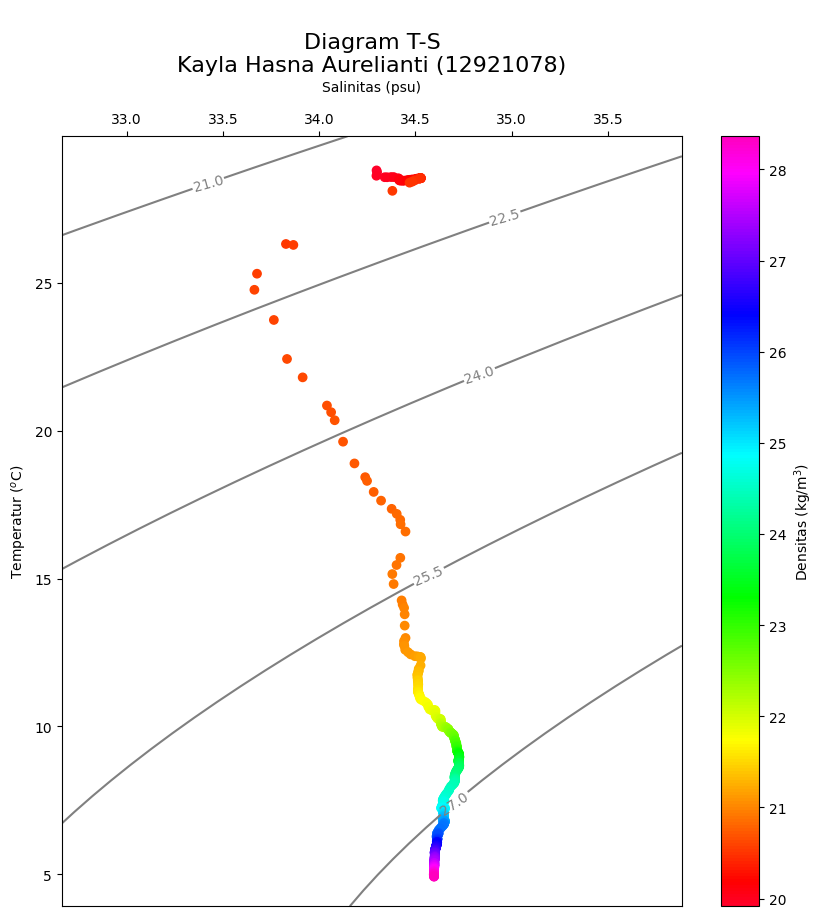

<Figure size 640x480 with 0 Axes>

In [22]:
#Menghitung densitas massa air
Tmin=np.min(temp)
Tmax=np.max(temp)
Smin=np.min(sal)
Smax=np.max(sal)

tempL=np.linspace(Tmin-1,Tmax+1.156)
salL=np.linspace(Smin-1,Smax+1.156)

Tg,Sg=np.meshgrid(tempL,salL)
sigma_theta=gsw.sigma0(Sg,Tg)
cnt=np.linspace(sigma_theta.min(),sigma_theta.max(),510)

#Membuat plot T-S
fig,ax=plt.subplots(figsize=(10,10))
a=plt.scatter(sal,temp,c=cnt,cmap='gist_rainbow')
b=ax.contour(Sg,Tg,sigma_theta,zorder=1,colors='grey')
c=plt.clabel(b)
d=plt.colorbar(a)
e=d.set_label('Densitas (kg/m$^3$)')
ax.set_xlabel('Salinitas (psu)\n')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_ylabel('Temperatur ($^o$C)')
ax.set_title('\nDiagram T-S\n'+ 'Kayla Hasna Aurelianti (12921078)',fontsize=16)

#show gambar tanpa export
plt.show()

#export gambar, berikan directory lokasi export
plt.savefig('/content/drive/MyDrive/andat/DiagramT-',dpi=150)

## 4. Diagram Hovmoller Depth-Station

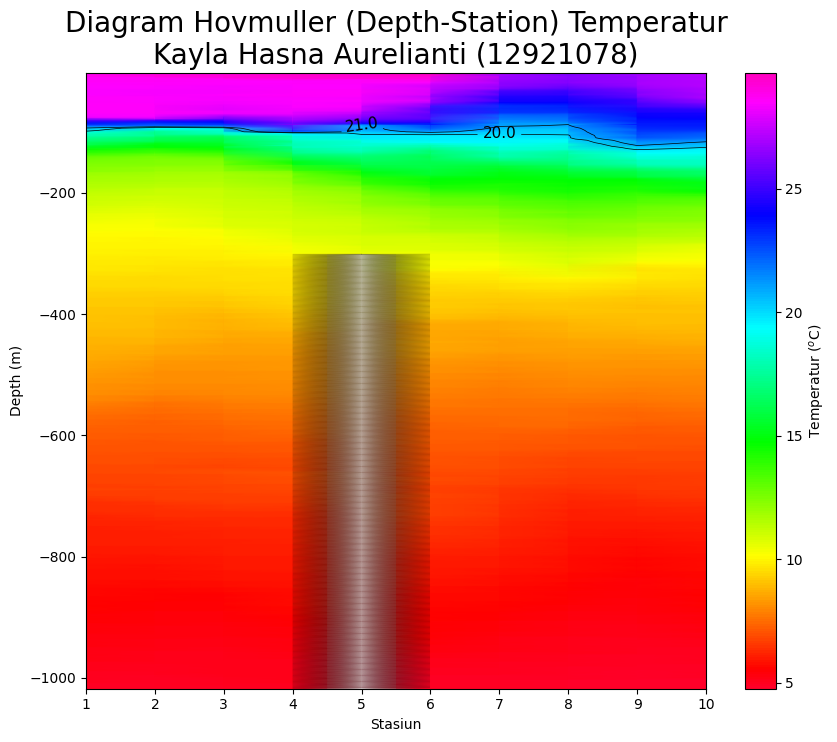

<Figure size 640x480 with 0 Axes>

In [25]:
#Pendefinisian Variabel yang akan diplot
T_dum={0:data1['temp'],
       1:data2['temp'],
       2:data3['temp'],
       3:data4['temp'],
       4:data5['temp'],
       5:data6['temp'],
       6:data7['temp'],
       7:data8['temp'],
       8:data9['temp'],
       9:data10['temp']}

T_dum2=pd.DataFrame(T_dum)
T=T_dum2.T
site=np.arange(1,11,1)
depth=data1['dep']
#depthlabel=np.arange(-1000,100,100)
y,x=np.meshgrid(depth,site)

#Visualisasi Data
fig,ax=plt.subplots(figsize=(10,8))
a=plt.pcolormesh(x,-y,T,cmap='gist_rainbow',shading='gouraud')
b=plt.colorbar()
c=plt.contour(x,-y,T,[20,21],colors='k',linewidths=0.5)
d=b.set_label('Temperatur ($^o$C)')
plt.title('Diagram Hovmuller (Depth-Station) Temperatur\n'+'Kayla Hasna Aurelianti (12921078)',fontsize=20)
plt.clabel(c, fmt = '%2.1f', fontsize=11)
#ax.set_yticks(ticks=depthlabel)
ax.set(xlabel=('Stasiun'), ylabel = ('Depth (m)'))

#show gambar tanpa export
plt.show()

#export gambar, berikan directory lokasi export
plt.savefig('/content/drive/MyDrive/andat/DiagramHovmullerDepth-stationTemperature',dpi=150)

disusun oleh Aulia Salsabella, September 2020